## K_means
- Find randomly K center point
- Split data to K fold: m_j is center point
$$ j = \arg\min_{j} \|\mathbf{x}_i - \mathbf{m}_j\|_2^2 $$
- Find new m_j: average value of all point in fold_j
- Comeback to step 2
>- When process will be stop: don't have any update after updating new m_j

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ch1ex1.csv')
points = df.values

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1, n_init=20)
km.fit(points)
labels = km.predict(points)

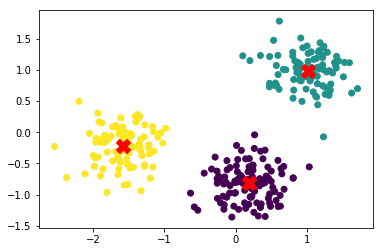

In [9]:
xs = points[:, 0]
ys = points[:, 1]
plt.scatter(xs, ys, c=labels)
centroids = km.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]
plt.scatter(centroids_x, centroids_y, s=200, marker='X', color='red')
plt.show()

In [13]:
inertias = {}
for k in range(1, 20):
    model = KMeans(n_clusters=k, n_init=20)
    model.fit(points)
    inertias[k] = model.inertia_
    # inertia_  is Sum of squared distances of samples to their closest cluster center

inertias

{1: 552.0877479509179,
 2: 226.85073849507586,
 3: 51.506998039897333,
 4: 44.627028600298466,
 5: 38.519393297279848,
 6: 32.994772624154692,
 7: 29.28506589639175,
 8: 26.044287630705199,
 9: 22.873554664581519,
 10: 21.035044565447322,
 11: 19.155975636378514,
 12: 17.770870038719714,
 13: 16.672747966451233,
 14: 15.174424443136719,
 15: 14.04908810604099,
 16: 12.86243276750861,
 17: 11.922213814713674,
 18: 11.310432760052084,
 19: 10.699046549378828}

- When we change k from 3 to 4: just a little bit change in inertia_ -> So we choose k = 3 to prevent overfit

## Hierarchical clustering

In [16]:
import pandas as pd

seeds_df = pd.read_csv('./data/seeds-less-rows.csv')
varieties = list(seeds_df.pop('grain_variety'))
samples = seeds_df.values

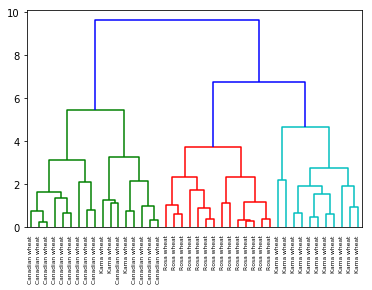

In [19]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)
plt.show()